<a href="https://colab.research.google.com/github/Samuel442/challenge-telecomX/blob/main/challenge_telecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📞 Telecom X - Análise de Evasão de Clientes

Você foi contratado como assistente de análise de dados na **Telecom X** e fará parte do projeto **"Churn de Clientes"**.  
A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será **coletar, tratar e analisar os dados**, utilizando **Python e suas principais bibliotecas** para extrair insights valiosos.

A partir da sua análise, os demais colegas da equipe de **Data Science** poderão avançar para **modelos preditivos** e desenvolver **estratégias para reduzir a evasão de clientes**.


In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
# Gera o link
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [243]:
# Carrega o Json como lista de dicionários
df_telecon = pd.read_json(url)

df_telecon.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [244]:
df_telecon.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [245]:
df_telecon.iloc[0]

,0
customerID,0002-ORFBO
Churn,No
customer,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
phone,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
internet,"{'InternetService': 'DSL', 'OnlineSecurity': '..."
account,"{'Contract': 'One year', 'PaperlessBilling': '..."


In [246]:
# normalizando o json
import pandas as pd
from pandas import json_normalize

# Normaliza cada coluna que contém dict
customer_norm  = json_normalize(df_telecon['customer'])
phone_norm     = json_normalize(df_telecon['phone'])
internet_norm  = json_normalize(df_telecon['internet'])
account_norm   = json_normalize(df_telecon['account'])

df_telecon_normalizado = pd.concat(
    [
        df_telecon[['customerID', 'Churn']],
        customer_norm,
        phone_norm,
        internet_norm,
        account_norm
    ],
    axis=1
)

df_telecon_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [247]:
df_telecon_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

## Etapa do EDA

In [248]:
# número de linhas e colunas ou seja clientes e variáveris a considerar
df_telecon_normalizado.shape

(7267, 21)

In [249]:
# tipo de dados
df_telecon_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [250]:
# Colunas
df_telecon_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [251]:
# separando por tipo
df_telecon_normalizado.select_dtypes(include=['int64', 'float64']).columns

Index(['SeniorCitizen', 'tenure', 'Charges.Monthly'], dtype='object')

In [252]:
df_telecon_normalizado.select_dtypes(include=['object']).columns

Index(['customerID', 'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Total'],
      dtype='object')

In [253]:
# valores ausentes
df_telecon_normalizado.isna().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [254]:
# análise de churn
df_telecon_normalizado['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [255]:
# análise do tipo de contrato
df_telecon_normalizado['Contract'].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [256]:
# percentual de churn por tipo de contrato
pd.crosstab(
    df_telecon_normalizado['Contract'],
    df_telecon_normalizado['Churn'],
    normalize='index'
)


Churn,,No,Yes
Contract,,,
Month-to-month,0.032459,0.554307,0.413233
One year,0.030283,0.860434,0.109282
Two year,0.027539,0.944923,0.027539


In [257]:
# estatísticas gerais
df_telecon_normalizado['Charges.Monthly'].describe()

,Charges.Monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


In [258]:
df_telecon_normalizado.groupby('Churn')['Charges.Monthly'].mean()

,Charges.Monthly
Churn,
,63.412277
No,61.265124
Yes,74.441332


In [259]:
df_telecon_normalizado.groupby(['Contract', 'Churn'])['Charges.Monthly'].mean()

Contract        Churn
Month-to-month           64.738077
                No       61.462635
                Yes      73.019396
One year                 71.148913
                No       62.508148
                Yes      85.050904
Two year                 52.407292
                No       60.012477
                Yes      86.777083
Name: Charges.Monthly, dtype: float64

In [260]:
# percentual de churn relacionado ao serviço de internet
pd.crosstab(df_telecon_normalizado['InternetService'],
            df_telecon_normalizado['Churn'],
            normalize='index')


Churn,,No,Yes
InternetService,,,
DSL,0.026929,0.788585,0.184486
Fiber optic,0.031895,0.562539,0.405566
No,0.034788,0.893738,0.071474


## Verificação de inconsistências nos dados

In [261]:
# verificação de elementos distintos
df_telecon_normalizado['Charges.Total'].unique()[:10]

array(['593.3', '542.4', '280.85', '1237.85', '267.4', '571.45',
       '7904.25', '5377.8', '340.35', '5957.9'], dtype=object)

In [262]:
# verifica valores vazios
df_telecon_normalizado['Charges.Total'].isna().sum()

np.int64(0)

In [263]:
# verificação de valores vazios
(df_telecon_normalizado['Charges.Total'].str.strip() == '').sum()

np.int64(11)

## Trata a coluna 'Charges.Total'

In [264]:
# converter vazio para NA pra converter em numérico depois
df_telecon_normalizado['Charges.Total'] = (
    df_telecon_normalizado['Charges.Total']
    .replace(r'^\s*$', pd.NA, regex=True)
)

In [265]:
# conta os NA
df_telecon_normalizado['Charges.Total'].isna().sum()

np.int64(11)

In [266]:
# converte em numérico
df_telecon_normalizado['Charges.Total'] = pd.to_numeric(
    df_telecon_normalizado['Charges.Total'],
    errors='coerce'
)


In [267]:
df_telecon_normalizado['Charges.Total'].isna().sum()

np.int64(11)

In [268]:
df_telecon_normalizado['Charges.Total'].isna().sum()

np.int64(11)

## Tratamento de inconsistências no dataset como um todo

In [269]:
df_telecon_normalizado.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [270]:
# ver duplicadas
df_telecon_normalizado.duplicated().sum()

np.int64(0)

In [271]:
# coluna relacionadas a internet
for col in [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]:
    print(col)
    print(df_telecon_normalizado[col].value_counts())
    print('-' * 40)


OnlineSecurity
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64
----------------------------------------
OnlineBackup
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64
----------------------------------------
DeviceProtection
DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64
----------------------------------------
TechSupport
TechSupport
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64
----------------------------------------
StreamingTV
StreamingTV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64
----------------------------------------
StreamingMovies
StreamingMovies
No                     2870
Yes                    2816
No internet service

In [272]:
# muda o texto da coluna
cols_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df_telecon_normalizado[cols_internet] = (
    df_telecon_normalizado[cols_internet]
    .replace('No internet service', 'No')
)

In [273]:
# contagem de valores dessas colunas
df_telecon_normalizado['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,5189
Yes,2078


## Coluna de Contas Diárias

In [274]:
# achando o valor diário
df_telecon_normalizado['Contas_Diarias'] = (
    df_telecon_normalizado['Charges.Monthly'] / 30
)

In [275]:
# validação da existencia da coluna
df_telecon_normalizado[['Charges.Monthly', 'Contas_Diarias']].head()

,Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [276]:
# calcula média relcionado ao  churn
df_telecon_normalizado.groupby('Churn')['Contas_Diarias'].mean()

,Contas_Diarias
Churn,
,2.113743
No,2.042171
Yes,2.481378


## Padronização e Transformação de Dados

In [277]:
# nomes didáticos nas colunas
df_telecon_normalizado = df_telecon_normalizado.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'evasao',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'possui_parceiro',
    'Dependents': 'possui_dependentes',
    'tenure': 'tempo_contrato_meses',
    'PhoneService': 'servico_telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'metodo_pagamento',
    'Charges.Monthly': 'cobranca_mensal',
    'Charges.Total': 'cobranca_total',
    'Contas_Diarias': 'cobranca_diaria'
})


In [278]:
# verificando
df_telecon_normalizado.columns

Index(['id_cliente', 'evasao', 'genero', 'idoso', 'possui_parceiro',
       'possui_dependentes', 'tempo_contrato_meses', 'servico_telefone',
       'multiplas_linhas', 'tipo_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'cobranca_mensal', 'cobranca_total',
       'cobranca_diaria'],
      dtype='object')

In [279]:
# colunas sim e nao ingles pra portugues
colunas_sim_nao = [
    'evasao', 'possui_parceiro', 'possui_dependentes',
    'servico_telefone', 'multiplas_linhas',
    'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'streaming_tv', 'streaming_filmes',
    'fatura_digital'
]

df_telecon_normalizado[colunas_sim_nao] = (
    df_telecon_normalizado[colunas_sim_nao]
    .replace({'Yes': 'Sim', 'No': 'Não'})
)


In [280]:
# simplificação do texto
colunas_internet = [
    'seguranca_online', 'backup_online',
    'protecao_dispositivo', 'suporte_tecnico',
    'streaming_tv', 'streaming_filmes'
]

df_telecon_normalizado[colunas_internet] = (
    df_telecon_normalizado[colunas_internet]
    .replace({'No internet service': 'Não'})
)


In [281]:
# confirmação da saída
df_telecon_normalizado['seguranca_online'].value_counts()

,count
seguranca_online,
Não,5189
Sim,2078


In [282]:
# binarização

# cópia
df_bin = df_telecon_normalizado.copy()

mapa_binario = {'Sim': 1, 'Não': 0}

colunas_binarias = [
    'evasao', 'possui_parceiro', 'possui_dependentes',
    'servico_telefone', 'multiplas_linhas',
    'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'streaming_tv', 'streaming_filmes',
    'fatura_digital'
]

df_bin[colunas_binarias] = df_bin[colunas_binarias].replace(mapa_binario)

# verifica
df_bin[colunas_binarias].head()

/tmp/ipython-input-3985265753.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bin[colunas_binarias] = df_bin[colunas_binarias].replace(mapa_binario)


,evasao,possui_parceiro,possui_dependentes,servico_telefone,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,fatura_digital
0,0,1,1,1,0,0,1,0,1,1,0,1
1,0,0,0,1,1,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1
3,1,1,0,1,0,0,1,1,0,1,1,1
4,1,1,0,1,0,0,0,0,1,1,0,1


In [283]:
# conferindo tipos
df_bin[['genero', 'tipo_internet', 'tipo_contrato', 'metodo_pagamento']].dtypes

,0
genero,object
tipo_internet,object
tipo_contrato,object
metodo_pagamento,object


In [284]:
# converte as demais em 0 e 1
df_final = pd.get_dummies(
    df_bin,
    columns=['genero', 'tipo_internet', 'tipo_contrato', 'metodo_pagamento'],
    drop_first=False
)


In [285]:
# verificação
df_final.shape
df_final.head()

,id_cliente,evasao,idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefone,multiplas_linhas,seguranca_online,backup_online,...,tipo_internet_DSL,tipo_internet_Fiber optic,tipo_internet_No,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pagamento_Bank transfer (automatic),metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,0,0,0,0,9,1,1,0,0,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,1,1,1,0,3,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [286]:
# remove coluna identificadora
df_final = df_final.drop(columns=['id_cliente'])

## Análise descritiva

In [287]:
# visão geral dataset
df_final.describe()

,idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefone,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,fatura_digital,cobranca_mensal,cobranca_total,cobranca_diaria
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [288]:
# colunas numéricas
colunas_numericas = [
    'tempo_contrato_meses',
    'cobranca_mensal',
    'cobranca_total',
    'cobranca_diaria'
]

df_final[colunas_numericas].describe()


,tempo_contrato_meses,cobranca_mensal,cobranca_total,cobranca_diaria
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [289]:
# distribuição de clientes frequencia
df_telecon_normalizado['tipo_contrato'].value_counts(normalize=True)

,proportion
tipo_contrato,
Month-to-month,0.551122
Two year,0.239851
One year,0.209027


In [290]:
# análise segmentada por evasão
df_final.groupby('evasao')['cobranca_mensal'].mean()
df_final.groupby('evasao')['tempo_contrato_meses'].median()

,tempo_contrato_meses
evasao,
0,38.0
1,10.0
,29.0


In [291]:
# visão geral
df_final.describe()

,idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefone,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,fatura_digital,cobranca_mensal,cobranca_total,cobranca_diaria
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


# variáveis chave
tempo_contrato_meses   → fidelidade

cobranca_mensal        → custo percebido

cobranca_total         → valor do cliente

cobranca_diaria        → impacto diário


In [292]:
# lista das principais para análise descritiva
colunas_comportamento = [
    'tempo_contrato_meses',
    'cobranca_mensal',
    'cobranca_total',
    'cobranca_diaria'
]

df_final[colunas_comportamento].describe()


,tempo_contrato_meses,cobranca_mensal,cobranca_total,cobranca_diaria
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [293]:
# comparação por evasão
df_final.groupby('evasao')[colunas_comportamento].agg([
    'mean', 'median', 'std'
])

tempo_contrato_meses                   cobranca_mensal          \
                       mean median        std            mean  median   
evasao                                                                  
0                 37.569965   38.0  24.113777       61.265124  64.425   
1                 17.979133   10.0  19.531123       74.441332  79.650   
                  31.571429   29.0  24.998552       63.412277  69.100   

                  cobranca_total                        cobranca_diaria  \
              std           mean    median          std            mean   
evasao                                                                    
0       31.092648    2555.344141  1683.600  2329.456984        2.042171   
1       24.666053    1531.796094   703.550  1890.822994        2.481378   
        31.388712    2196.933705  1163.175  2329.961954        2.113743   

                            
          median       std  
evasao                      
0       2.147500  1.036422  
1       2.655000  0.822202  
        2.303333  1.046290

In [294]:
# distribuição de clientes
df_telecon_normalizado['tipo_contrato'].value_counts(normalize=True)
df_telecon_normalizado['tipo_internet'].value_counts(normalize=True)

,proportion
tipo_internet,
Fiber optic,0.440072
DSL,0.342370
No,0.217559


In [295]:
# analisar tempo relacionado a evasão
df_telecon_normalizado.groupby('evasao')['tempo_contrato_meses'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao,,,,,,,,
,224.0,31.571429,24.998552,1.0,7.0,29.0,56.0,72.0
Não,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Sim,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [296]:
# comparação direta
df_telecon_normalizado.groupby('evasao')['tempo_contrato_meses'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
)

,media,mediana,desvio_padrao
evasao,,,
,31.571429,29.0,24.998552
Não,37.569965,38.0,24.113777
Sim,17.979133,10.0,19.531123


## 📊 Análise de Ciclo de Vida do Cliente

### ⏱️ Fidelização vs. Tempo de Casa
A análise revela um abismo temporal entre os perfis de clientes, confirmando que a retenção é construída a longo prazo:

* **Clientes Ativos (Fidelizados):** Apresentam uma mediana de **38 meses** de contrato.
* **Clientes em Evasão (Churn):** Concentram-se no início da jornada, com mediana de apenas **10 meses**.

> **🎯 Conclusão:** O risco de perda é crítico nos primeiros meses. Superar a barreira do primeiro ano é o principal motor para aumentar o LTV (Lifetime Value).

In [297]:
# tipo de contrato, tempo em meses relacionado a evasão
df_telecon_normalizado.groupby(['tipo_contrato', 'evasao'])['tempo_contrato_meses'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std',
    contagem='count'
)


media  mediana  desvio_padrao  contagem
tipo_contrato  evasao                                             
Month-to-month         16.807692      9.0      17.425410       130
               Não     21.033333     16.0      18.398051      2220
               Sim     14.016918      7.0      15.828615      1655
One year               46.869565     51.5      17.850750        46
               Não     41.674063     43.0      19.094012      1307
               Sim     44.963855     48.0      18.367261       166
Two year               56.895833     66.0      18.430132        48
               Não     56.602914     64.0      18.362330      1647
               Sim     61.270833     65.5      11.004331        48

### 🧠 Conclusão estratégica

> **👉 Insight Principal:** O tipo de contrato é uma das variáveis **MAIS importantes** do dataset.

---

### Resumo de Retenção
* 🔴 **Month-to-month:** Alto churn, perda rápida de clientes.
* 🟡 **1 ano:** Churn baixo.
* 🟢 **2 anos:** Churn quase inexistente.

---

### 💡 Ações Sugeridas
1. **Incentivar migração:** Criar campanhas para converter planos *mensais* em *anuais*.
2. **Retenção preventiva:** Focar em ofertas de retenção nos primeiros **6–9 meses**.
3. **Monitoramento ativo:** Acompanhar clientes mensais com alto custo operacional.

In [298]:
# pagamento por dia e evasão
df_telecon_normalizado.groupby('evasao')['cobranca_diaria'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std',
    minimo='min',
    maximo='max'
)


,media,mediana,desvio_padrao,minimo,maximo
evasao,,,,,
,2.113743,2.303333,1.046290,0.625000,3.851667
Não,2.042171,2.147500,1.036422,0.608333,3.958333
Sim,2.481378,2.655000,0.822202,0.628333,3.945000


## 💸 Impacto Financeiro na Evasão

### 🔍 Correlação de Cobrança Diária
A análise descritiva identificou que o custo do serviço é um gatilho direto para o *churn*. Clientes que cancelam o serviço pagam, em média, valores mais altos diariamente.

* **💰 Ticket Elevado:** O padrão de maior cobrança se mantém estável tanto na **média** quanto na **mediana**.
* **📉 Baixa Variabilidade:** Clientes que evadem possuem valores de cobrança mais concentrados.
* **🚫 Estabilidade de Dados:** O comportamento é consistente e não é distorcido por *outliers* (valores extremos).

> **💡 Hipótese Estratégica:** A concentração em faixas de preço elevadas sugere que a percepção de valor não está acompanhando o custo, gerando insatisfação e saída precoce.

## Distribuição da Evasão

In [299]:
# analisando a evasão
df_telecon_normalizado['evasao'].value_counts()

,count
evasao,
Não,5174
Sim,1869
,224


In [300]:
# em percentual
df_telecon_normalizado['evasao'].value_counts(normalize=True) * 100

,proportion
evasao,
Não,71.198569
Sim,25.719004
,3.082427


In [301]:
# trata a terceira coluna remover registro sem evasão definida
df_telecon_normalizado = df_telecon_normalizado[
    df_telecon_normalizado['evasao'].isin(['Sim', 'Não'])
]

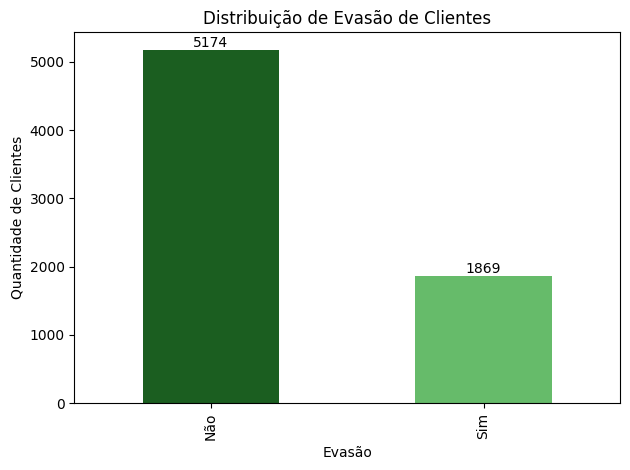

In [324]:
import matplotlib.pyplot as plt

# Contagem com ordem fixa
contagem_evasao = (
    df_telecon_normalizado['evasao']
    .value_counts()
    .reindex(['Não', 'Sim'])
)

# Cores padrão do relatório
cores = ['#1b5e20', '#66bb6a']

contagem_evasao.plot(
    kind='bar',
    color=cores,
    title='Distribuição de Evasão de Clientes'
)

plt.xlabel('Evasão')
plt.ylabel('Quantidade de Clientes')

# Rótulos nas barras
for i, valor in enumerate(contagem_evasao):
    plt.text(i, valor, f'{valor}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [303]:
# garantindo o sim e não
df_telecon_normalizado = df_telecon_normalizado[
    df_telecon_normalizado['evasao'].isin(['Sim', 'Não'])
]

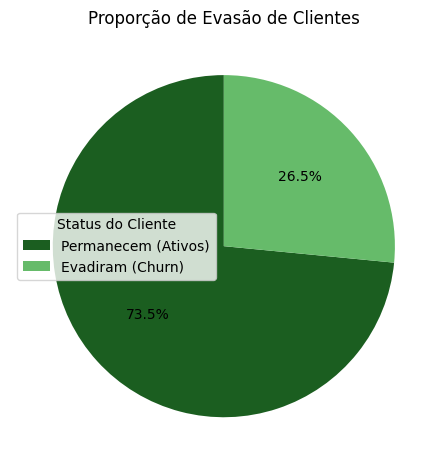

In [323]:
import matplotlib.pyplot as plt

# Ordem fixa e consciente
contagem_evasao = (
    df_telecon_normalizado['evasao']
    .value_counts()
    .reindex(['Não', 'Sim'])
)

# Padrão de cores (igual aos outros gráficos)
cores = ['#1b5e20', '#66bb6a']  # Verde escuro | Verde claro

contagem_evasao.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    title='Proporção de Evasão de Clientes',
    labels=None
)

plt.legend(
    labels=['Permanecem (Ativos)', 'Evadiram (Churn)'],
    loc='best',
    title='Status do Cliente'
)

plt.ylabel('')
plt.tight_layout()
plt.show()


### 📊 Análise de Evasão (Churn Analysis)

A análise da distribuição da variável **evasão** mostra que:
* A maioria dos clientes **permanece ativa**.
* Uma parcela significativa apresenta **churn**.

> **Conclusão:** A proporção de clientes que evadiram indica que a evasão é um **problema relevante para o negócio**, justificando análises mais profundas para identificar padrões e fatores associados à saída dos clientes.

## Contagem de Evasão por Variáveis Categóricas

In [305]:
# tipo de contrato pr evasão
df_telecon_normalizado.groupby(['tipo_contrato', 'evasao']).size()

tipo_contrato   evasao
Month-to-month  Não       2220
                Sim       1655
One year        Não       1307
                Sim        166
Two year        Não       1647
                Sim         48
dtype: int64

In [306]:
# percentual de evasão por cada tipo de contrato
(
    df_telecon_normalizado
    .groupby('tipo_contrato')['evasao']
    .value_counts(normalize=True)
)


tipo_contrato   evasao
Month-to-month  Não       0.572903
                Sim       0.427097
One year        Não       0.887305
                Sim       0.112695
Two year        Não       0.971681
                Sim       0.028319
Name: proportion, dtype: float64

In [307]:
# organizando em tabela
pd.crosstab(
    df_telecon_normalizado['tipo_contrato'],
    df_telecon_normalizado['evasao'],
    normalize='index'
)

evasao,Não,Sim
tipo_contrato,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


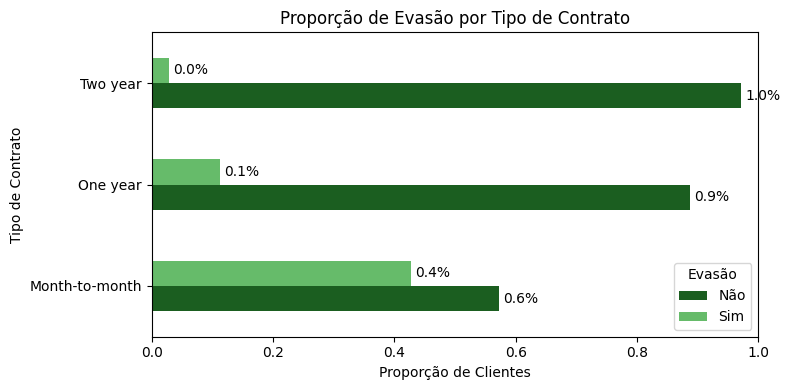

In [322]:
import matplotlib.pyplot as plt
import pandas as pd

# Tabela de proporções
tabela_contrato = pd.crosstab(
    df_telecon_normalizado['tipo_contrato'],
    df_telecon_normalizado['evasao'],
    normalize='index'
)

# Cores (verde escuro = não evadiu | verde claro = evadiu)
cores = ['#1b5e20', '#66bb6a']

ax = tabela_contrato[['Não', 'Sim']].plot(
    kind='barh',
    figsize=(8, 4),
    color=cores
)

# Adicionando rótulos nas barras
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',
        label_type='edge',
        padding=3
    )

plt.title('Proporção de Evasão por Tipo de Contrato')
plt.xlabel('Proporção de Clientes')
plt.ylabel('Tipo de Contrato')
plt.legend(title='Evasão')
plt.xlim(0, 1)  # garante escala correta de proporção
plt.tight_layout()
plt.show()


### 📋 Análise de Evasão por Tipo de Contrato

A análise da evasão por tipo de contrato revela que:

* **Contratos Mensais:** Apresentam uma taxa de evasão **consideravelmente maior**.
* **Contratos Anuais/Bianuais:** Apresentam maior retenção de clientes.

> **Insight:** Isso sugere que a **duração do contrato** está fortemente associada à permanência do cliente, indicando que contratos de longo prazo são um fator de retenção crucial.

In [309]:
# por tipo de internet
pd.crosstab(
    df_telecon_normalizado['tipo_internet'],
    df_telecon_normalizado['evasao'],
    normalize='index'
)


evasao,Não,Sim
tipo_internet,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


### 🌐 Análise de Churn por Tecnologia de Internet

A análise da evasão baseada no tipo de serviço de internet revela dados críticos:

* **Fibra Óptica:** Maior taxa de churn (**≈41%**).
* **DSL:** Taxa de churn moderada (**≈18%**).
* **Sem Internet:** Menor taxa de churn (**≈7%**).

> **💡 Insight Estratégico:** A alta evasão na fibra óptica sugere expectativas elevadas não atendidas. Isso reforça a necessidade urgente de melhorias na **experiência do cliente**, **qualidade da conexão** ou revisão da **política de preços** para este segmento específico.

In [310]:
# por método de pagamento
pd.crosstab(
    df_telecon_normalizado['metodo_pagamento'],
    df_telecon_normalizado['evasao'],
    normalize='index'
)


evasao,Não,Sim
metodo_pagamento,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


### 💳 Impacto do Método de Pagamento na Evasão

A análise revela que o método de pagamento é um dos maiores indicadores de fidelidade:

* **Cheque Eletrônico:** Maior taxa de churn do portfólio (**≈44%**).
* **Pagamentos Automáticos:** Taxas significativamente menores (**≈15–16%**), tanto para Cartão de Crédito quanto Débito em Conta.

> **🚀 Conclusão:** A **automatização do pagamento** é um fator crítico para a retenção. Incentivar a migração de clientes para métodos automáticos pode reduzir drasticamente o cancelamento por esquecimento ou atrito no processo de pagamento.

In [311]:
# por genero
pd.crosstab(
    df_telecon_normalizado['genero'],
    df_telecon_normalizado['evasao'],
    normalize='index'
)

evasao,Não,Sim
genero,,
Female,0.730791,0.269209
Male,0.738397,0.261603


### 🚻 Análise de Evasão por Gênero

A análise comparativa entre os gêneros mostra um equilíbrio nas taxas de cancelamento:

* **Homens:** Taxa de churn de ≈25%.
* **Mulheres:** Taxa de churn de ≈25%.

> **⚖️ Conclusão:** O gênero **não exerce influência relevante** na decisão de cancelamento. Isso indica que as causas da evasão são comportamentais ou contratuais, e não demográficas, permitindo que as estratégias de retenção sejam aplicadas de forma uniforme para ambos os grupos.

## Contagem de Evasão por Variáveis Numéricas

In [312]:
# tempo de contrato por evasão
df_telecon_normalizado.groupby('evasao')['tempo_contrato_meses'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao,,,,,,,,
Não,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Sim,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


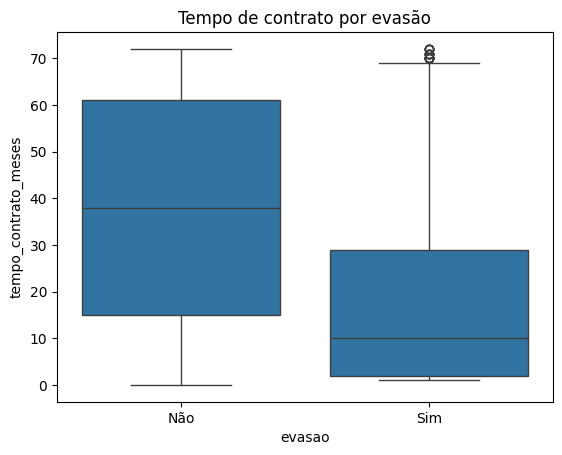

In [313]:
# boxplot para comparação
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=df_telecon_normalizado,
    x='evasao',
    y='tempo_contrato_meses'
)

plt.title('Tempo de contrato por evasão')
plt.show()

In [314]:
# cobrança mensalpor evasão
df_telecon_normalizado.groupby('evasao')['cobranca_mensal'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao,,,,,,,,
Não,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Sim,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


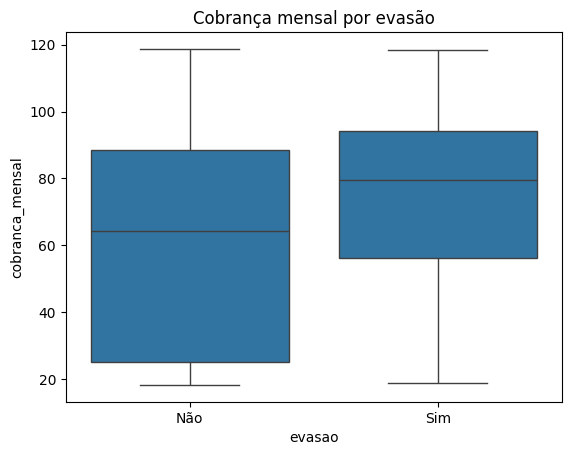

In [315]:
# boxplot para essa análise
sns.boxplot(
    data=df_telecon_normalizado,
    x='evasao',
    y='cobranca_mensal'
)

plt.title('Cobrança mensal por evasão')
plt.show()


In [316]:
# essa depende do tempo de contrato
df_telecon_normalizado.groupby('evasao')['cobranca_total'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao,,,,,,,,
Não,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
Sim,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


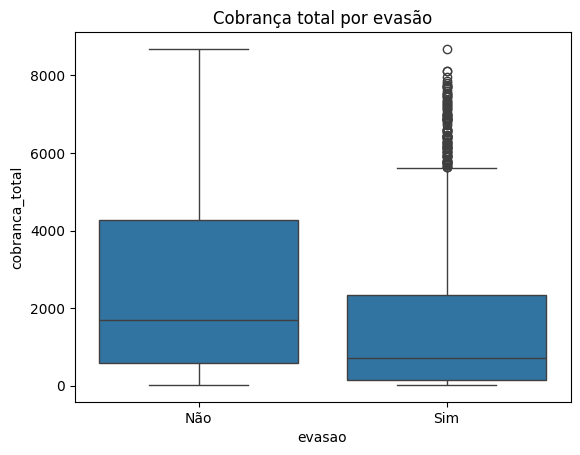

In [317]:
sns.boxplot(
    data=df_telecon_normalizado,
    x='evasao',
    y='cobranca_total'
)

plt.title('Cobrança total por evasão')
plt.show()

In [318]:
# cobrança diária por evasão
df_telecon_normalizado.groupby('evasao')['cobranca_diaria'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao,,,,,,,,
Não,5174.0,2.042171,1.036422,0.608333,0.836667,2.1475,2.946667,3.958333
Sim,1869.0,2.481378,0.822202,0.628333,1.871667,2.6550,3.140000,3.945000


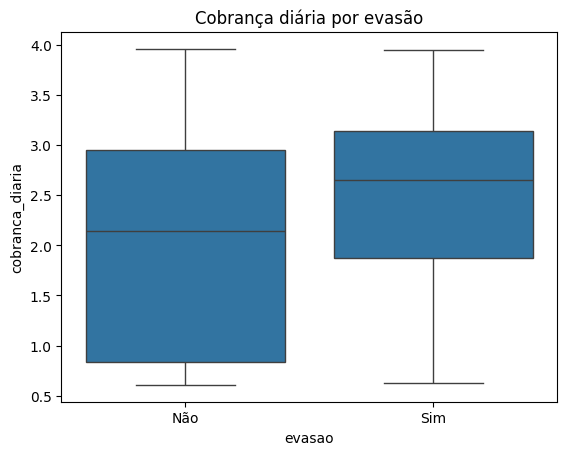

In [319]:
sns.boxplot(
    data=df_telecon_normalizado,
    x='evasao',
    y='cobranca_diaria'
)

plt.title('Cobrança diária por evasão')
plt.show()


## Introdução relatório final

# Projeto: Análise de Retenção de Clientes (Churn Telecom X)

A evasão de clientes (**Churn**) é um dos principais desafios enfrentados por várias empresas não só de telecomunicações, pois impacta diretamente a receita e os custos operacionais. Entender os fatores que levam um cliente a cancelar os serviços é essencial para o desenvolvimento de estratégias de retenção mais eficazes.

### 🎯 Objetivo do Projeto
O objetivo deste projeto é realizar uma **análise exploratória de dados (EDA)**, buscando identificar:
* **Padrões e comportamentos** de consumo;
* **Características** associadas à evasão;
* **Fatores contratuais** que influenciam o cancelamento.

A partir dessa análise, pretendo extrair **insights estratégicos** que auxiliem na redução do churn e no aumento da retenção de clientes.

## Limpeza e Tratamento de Dados

Nesta etapa, foi realizado o processo de importação, limpeza e tratamento dos dados, garantindo que a base estivesse adequada para análise.

### 🛠️ Principais Ações Realizadas:

* **Inspeção Inicial:** Importação da base e verificação de tipos de dados.
    * *Método utilizado:* `read_json, info`
* **Normalização:** Etapa paa desaninhar o json.
    * *Método utilizado:* `json_normalize`
* **Padronização:** Tradução dos nomes das colunas para o português para melhor compreensão.
    * *Método utilizado:* `rename`
* **Transformação de Dados:** Conversão de variáveis binárias (“Sim”/“Não”) para valores numéricos (**Label Encoding**).
    * *Método utilizado:* `replace e listas`
* **Engenharia de Variáveis:** Criação da variável de **cobrança diária** a partir da mensal para uma análise financeira mais granular.
    * *Variável:* `Contas_Diarias`
* **Codificação:** Aplicação de **One-Hot Encoding** em variáveis categóricas, preparando a base para modelos estatísticos.
    * *Método utilizado:* `foi transformado o sim e não em 1 e 0`

> **Resultado:** A base de dados tornou-se consistente, padronizada e pronta para a **Análise mais profunda**.

## Análise Exploratória de Dados (EDA)

Nesta etapa, exploramos os dados para identificar padrões e comportamentos que explicam por que os clientes saem da empresa.

### 3.1 Distribuição da Evasão

Inicialmente, foi analisada a distribuição da variável de **evasão** para entender a proporção de clientes que permaneceram e daqueles que cancelaram o serviço.

* **Status Ativo:** Representa a maior parte da base de clientes.
* **Churn (Evasão):** Uma parcela significativa cancelou o serviço.

> **💡 Observação:** O volume de cancelamentos reforça a importância de entender os fatores associados a esse comportamento para criar estratégias de retenção eficazes.

---
#### 📊 Visualização da Proporção
---

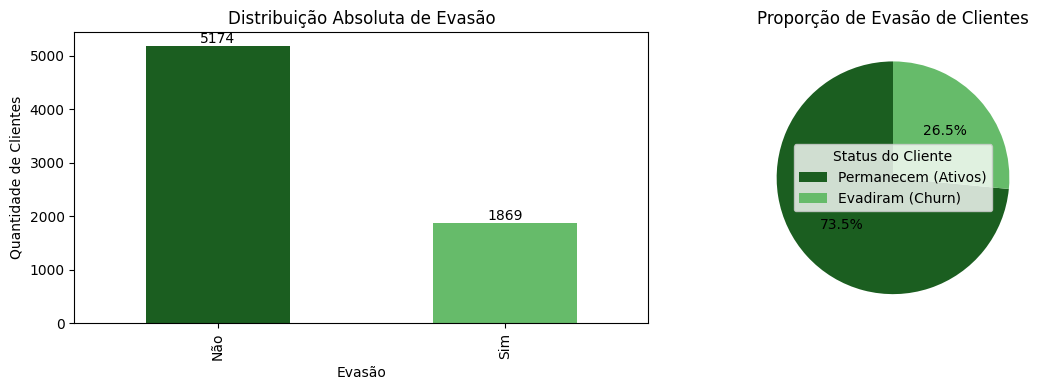

In [326]:

# Dados com ordem fixa
contagem_evasao = (
    df_telecon_normalizado['evasao']
    .value_counts()
    .reindex(['Não', 'Sim'])
)

# Padrão de cores
cores = ['#1b5e20', '#66bb6a']  # Verde escuro | Verde claro

# Criando a figura com 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# =========================
# Gráfico de Barras
# =========================
contagem_evasao.plot(
    kind='bar',
    color=cores,
    ax=axes[0]
)

axes[0].set_title('Distribuição Absoluta de Evasão')
axes[0].set_xlabel('Evasão')
axes[0].set_ylabel('Quantidade de Clientes')

# Rótulos nas barras
for i, valor in enumerate(contagem_evasao):
    axes[0].text(i, valor, f'{valor}', ha='center', va='bottom')

# =========================
# Gráfico de Pizza
# =========================
contagem_evasao.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    labels=None,
    ax=axes[1]
)

axes[1].set_title('Proporção de Evasão de Clientes')
axes[1].set_ylabel('')

axes[1].legend(
    labels=['Permanecem (Ativos)', 'Evadiram (Churn)'],
    loc='best',
    title='Status do Cliente'
)

plt.tight_layout()
plt.show()


### Tempo de Contrato × Evasão

A análise do tempo de contrato revelou diferenças significativas entre clientes que evadiram e os que permaneceram:

* **Clientes que cancelaram (Churn):** Apresentam, em média, um tempo de contrato muito menor, com a mediana concentrada nos **primeiros meses**.
* **Padrão detectado:** A evasão ocorre predominantemente no **início do relacionamento** com a empresa.

> **💡 Insight Estratégico:** Existe uma "janela de risco" nos meses iniciais. Ações de retenção e *onboarding* (boas-vindas) nos primeiros meses são fundamentais para aumentar o *Lifetime Value* (LTV) do cliente.

---
#### 📊 Estatísticas Descritivas e Distribuição
---

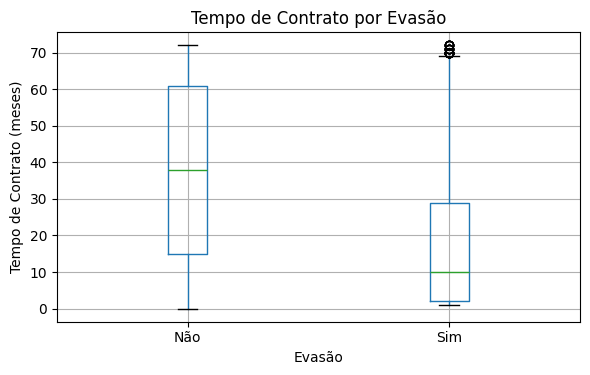

In [329]:
import matplotlib.pyplot as plt

df_telecon_normalizado.boxplot(
    column='tempo_contrato_meses',
    by='evasao',
    figsize=(6, 4)
)

plt.title('Tempo de Contrato por Evasão')
plt.suptitle('')
plt.xlabel('Evasão')
plt.ylabel('Tempo de Contrato (meses)')
plt.tight_layout()
plt.show()


### Tipo de Contrato × Evasão

Ao analisar a evasão em função do tipo de contrato, observa-se uma correlação clara entre a duração do compromisso e a fidelidade do cliente:

* **Contratos Mensais (Month-to-month):** Apresentam uma taxa de evasão **significativamente maior**.
* **Contratos Longos (One year / Two year):** Apresentam taxas de evasão muito menores.

> **💡 Conclusão:** Contratos de maior duração são um dos principais pilares de retenção da empresa. Isso sugere que estratégias para converter clientes mensais em planos anuais podem reduzir drasticamente o faturamento perdido.

---
#### 📊 Proporção de Evasão por Tipo de Contrato
---

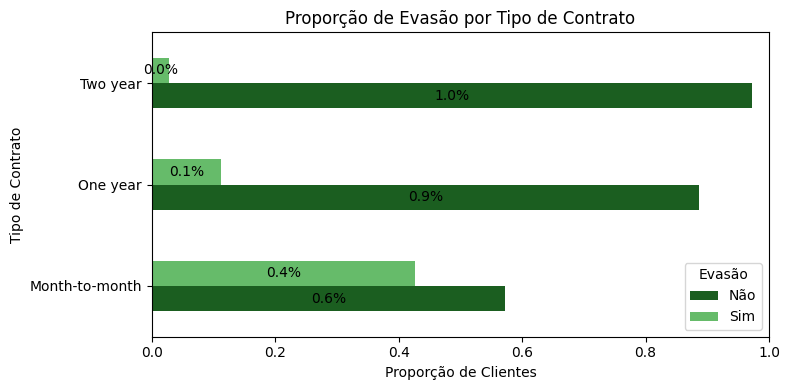

In [331]:
import matplotlib.pyplot as plt
import pandas as pd

# Tabela de proporções
tabela_contrato = pd.crosstab(
    df_telecon_normalizado['tipo_contrato'],
    df_telecon_normalizado['evasao'],
    normalize='index'
)

# Cores padrão
cores = ['#1b5e20', '#66bb6a']  # Não | Sim

ax = tabela_contrato[['Não', 'Sim']].plot(
    kind='barh',
    figsize=(8, 4),
    color=cores
)

# Rótulos nas barras
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',
        label_type='center'
    )

plt.title('Proporção de Evasão por Tipo de Contrato')
plt.xlabel('Proporção de Clientes')
plt.ylabel('Tipo de Contrato')
plt.legend(title='Evasão')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


### Cobranças (Mensal, Diária e Total) × Evasão

A análise das variáveis financeiras revelou um padrão importante sobre o comportamento de gastos dos clientes que cancelam o serviço:

* **Cobrança Total:** Clientes que evadiram possuem menor valor acumulado, o que está diretamente ligado ao seu **menor tempo de permanência** na base.
* **Cobrança Mensal e Diária:** Clientes em churn tendem a apresentar **valores médios mais elevados**.

> **💡 Insight:** Isso sugere que o custo percebido pode ser um fator determinante. Clientes que pagam mais caro por dia/mês e não percebem valor suficiente no serviço tendem a cancelar mais rápido.

---
#### 📊 Distribuição Financeira por Status de Evasão
*A visualização conjunta das cobranças mensal, diária e total evidencia padrões distintos entre clientes ativos e evadidos. Observa-se que clientes que evadiram apresentam cobranças mensais e diárias mais elevadas, porém menor cobrança total acumulada, reflexo direto do menor tempo de permanência.*
---

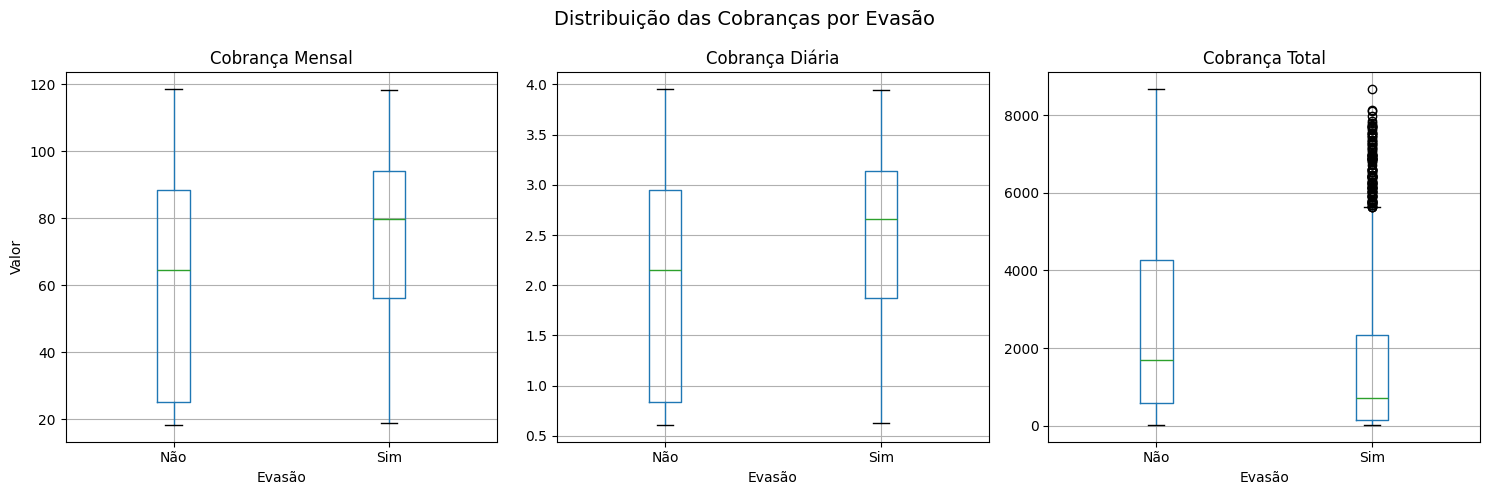

In [332]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Cobrança Mensal
df_telecon_normalizado.boxplot(
    column='cobranca_mensal',
    by='evasao',
    ax=axes[0]
)
axes[0].set_title('Cobrança Mensal')
axes[0].set_xlabel('Evasão')
axes[0].set_ylabel('Valor')

# Cobrança Diária
df_telecon_normalizado.boxplot(
    column='cobranca_diaria',
    by='evasao',
    ax=axes[1]
)
axes[1].set_title('Cobrança Diária')
axes[1].set_xlabel('Evasão')

# Cobrança Total
df_telecon_normalizado.boxplot(
    column='cobranca_total',
    by='evasao',
    ax=axes[2]
)
axes[2].set_title('Cobrança Total')
axes[2].set_xlabel('Evasão')

plt.suptitle('Distribuição das Cobranças por Evasão', fontsize=14)
plt.tight_layout()
plt.show()


### Variáveis Categóricas × Evasão

A evasão também foi analisada em função de variáveis categóricas para identificar perfis de clientes com maior risco de cancelamento. Os resultados indicam que:

* **Tecnologia de Internet:** Clientes com **Fiber optic** apresentam a maior taxa de evasão, sugerindo problemas de expectativa ou preço neste segmento.
* **Método de Pagamento:** O uso de **Electronic check** está fortemente associado a uma maior evasão, enquanto métodos automáticos (Cartão/Débito) apresentam melhor retenção.
* **Fatores Demográficos:** O **gênero** não demonstrou influência significativa, indicando que a evasão é motivada por fatores externos ao perfil pessoal.

> **💡 Conclusão:** O perfil crítico de churn é o cliente que utiliza fibra óptica e paga via cheque eletrônico. Estratégias focadas na mudança do método de pagamento e na melhoria da experiência da fibra podem ser altamente eficazes.

---
#### 📊 Comparações por Categoria
*Observa-se que clientes com Fiber optic apresentam a maior proporção de evasão quando comparados aos demais tipos de internet. Isso sugere possíveis insatisfações relacionadas ao custo ou à qualidade percebida do serviço, tornando esse segmento um ponto crítico para ações de retenção.*
---

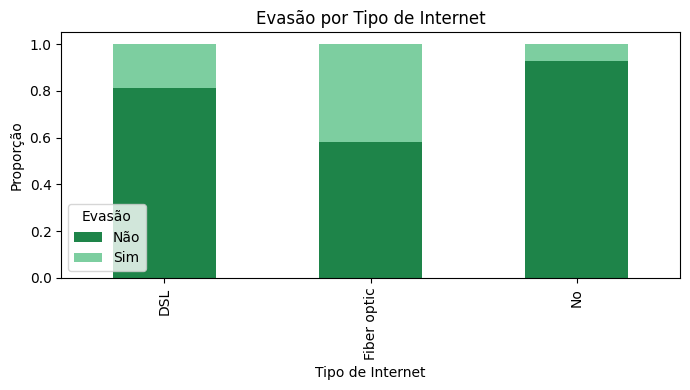

In [336]:
import matplotlib.pyplot as plt
import pandas as pd

# Cores padrão do relatório
cores = ['#1e8449', '#7dcea0']  # Verde escuro = Não | Verde claro = Sim

pd.crosstab(
    df_telecon_normalizado['tipo_internet'],
    df_telecon_normalizado['evasao'],
    normalize='index'
).plot(
    kind='bar',
    stacked=True,
    figsize=(7,4),
    color=cores,
    title='Evasão por Tipo de Internet'
)

plt.ylabel('Proporção')
plt.xlabel('Tipo de Internet')
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()


## Conclusões e Insights

A análise exploratória permitiu identificar padrões claros e comportamentais relacionados à evasão de clientes. Os principais **insights** obtidos foram:

* **Janela Crítica:** A evasão ocorre majoritariamente nos **primeiros meses** de contrato, indicando a necessidade de um *onboarding* mais eficiente.
* **Modelo de Negócio:** Contratos mensais (**Month-to-month**) apresentam o maior risco de churn, enquanto contratos anuais garantem maior estabilidade.
* **Eficiência Financeira:** Métodos de pagamento **automáticos** (Cartão de Crédito/Débito) estão diretamente associados a menores taxas de evasão.
* **Sensibilidade ao Preço:** Clientes com **custos mensais mais elevados** tendem a evadir com maior frequência, sugerindo que o custo-benefício percebido é um fator decisivo.
* **Neutralidade Demográfica:** Variáveis como **gênero** não apresentaram impacto relevante, o que permite estratégias de retenção padronizadas.

> **🚀 Recomendação:** Para reduzir o churn, a empresa deve incentivar a migração para contratos anuais e pagamentos automáticos, além de monitorar de perto os clientes de Fibra Óptica nos primeiros 90 dias.

## Recomendações Estratégicas

Com base nos resultados obtidos nesta análise, as seguintes ações são sugeridas para mitigar a evasão e maximizar a retenção:

1. **Foco no Onboarding:** Desenvolver ações de retenção e acompanhamento personalizado nos **primeiros meses** de contrato, onde o risco de churn é crítico.
2. **Migração de Planos:** Criar incentivos e benefícios (como descontos progressivos) para encorajar a migração de contratos mensais para **contratos anuais ou bianuais**.
3. **Automatização Financeira:** Estimular a adoção de **métodos de pagamento automáticos** para reduzir o atrito no faturamento e evitar cancelamentos por inadimplência acidental.
4. **Gestão de Valor:** Criar ofertas personalizadas e programas de fidelidade para clientes com **cobrança mensal elevada**, garantindo que percebam o valor do serviço proporcional ao preço pago.
5. **Inteligência Preditiva:** Utilizar os padrões identificados como base para o desenvolvimento de **modelos de Machine Learning**, visando prever o churn antes que ele ocorra.
